In [5]:
library(ggplot2)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [6]:
library(Seurat)

Attaching SeuratObject



In [7]:
mydir = "/share/ScratchGeneral/anncuo/OneK1K/"

In [8]:
input_files_dir = paste0(mydir,"input_files_CellRegMap/")

In [9]:
# Seurat object
sce_filename = paste0(mydir,"cell_type.RDS")

In [10]:
# 57,641 features 
# across 1272489 samples (cells)
# with two assays: SCT and RNA
# dimensionality reductions: PCA, UMAP
sce = readRDS(sce_filename)
sce

An object of class Seurat 
57641 features across 1272489 samples within 2 assays 
Active assay: SCT (24903 features, 3000 variable features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

In [11]:
# cells
ncol(sce)
head(colnames(sce))

[1] 1272489

[1] "AAACCTGAGAATGTTG-1" "AAACCTGAGAGAACAG-1" "AAACCTGAGCATGGCA-1"
[4] "AAACCTGAGTATTGGA-1" "AAACCTGAGTGTCCCG-1" "AAACCTGCAAATTGCC-1"

In [12]:
# genes
nrow(sce)
head(rownames(sce))

[1] 24903

[1] "RP11-34P13.7"  "RP11-34P13.8"  "AL627309.1"    "RP11-34P13.9" 
[5] "AP006222.2"    "RP4-669L17.10"

In [13]:
# subset genes based on chromosome

In [14]:
## gene location file
genes_filename =  paste0(mydir,"GeneLocations.tsv")
genes_df = read.csv(genes_filename, sep="\t")
head(genes_df)

,gene_name,gene_id,seqid,start,end,strand
,<chr>,<chr>,<chr>,<int>,<int>,<chr>
1,AL627309.1,ENSG00000237683,1,134901,139379,-
2,AL669831.1,ENSG00000269831,1,738532,739137,-
3,AL645608.2,ENSG00000269308,1,818043,819983,+
4,AL645608.1,ENSG00000268179,1,861264,866445,-
5,AL645728.1,ENSG00000215014,1,1510355,1511373,+
6,AL590822.2,ENSG00000269554,1,2121237,2123179,+


In [15]:
unique(genes_df$seqid)

[1] "1"  "2"  "3"  "4"  "5"  "6"  "7"  "X"  "8"  "9"  "10" "11" "12" "13" "14"
[16] "15" "16" "17" "18" "20" "19" "Y"  "22" "21" "MT"

In [16]:
length(unique(genes_df$gene_name))

[1] 32620

In [17]:
chr22_genes = unique(genes_df[genes_df$seqid == '22',"gene_name"])
length(chr22_genes)

[1] 703

In [18]:
length(chr22_genes[chr22_genes %in% rownames(sce)])

[1] 600

In [19]:
sce_22 = subset(sce, features = chr22_genes[chr22_genes %in% rownames(sce)])
sce_22

An object of class Seurat 
1200 features across 1272489 samples within 2 assays 
Active assay: SCT (600 features, 90 variable features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

In [20]:
## convert into AnnData

In [21]:
# library(SeuratData)
# library(SeuratDisk)

In [23]:
sce_22 = UpdateSeuratObject(sce_22)

Validating object structure

Updating object slots

Ensuring keys are in the proper strucutre

Ensuring feature names don't have underscores or pipes

Updating slots in RNA

Updating slots in SCT

Updating slots in pca

Updating slots in umap

Setting umap DimReduc to global

Setting assay used for SCTransform.RNA to RNA

Setting assay used for RunPCA.SCT to SCT

Setting assay used for RunUMAP.SCT.pca to SCT

Object representation is consistent with the most current Seurat version



In [ ]:
SaveH5Seurat(sce_22, filename = paste0(mydir,"sce22.h5Seurat"))

Creating h5Seurat file for version 3.1.5.9900

Adding counts for RNA

Adding data for RNA

No variable features found for RNA

No feature-level metadata found for RNA

Adding counts for SCT

Adding data for SCT

Adding scale.data for SCT

Adding variable features for SCT

Adding feature-level metadata for SCT



In [ ]:
Convert(paste0(mydir,"sce22.h5Seurat"), dest = "h5ad")

In [14]:
features = c('RP11-34P13.7','RP11-34P13.8','AL627309.1')

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



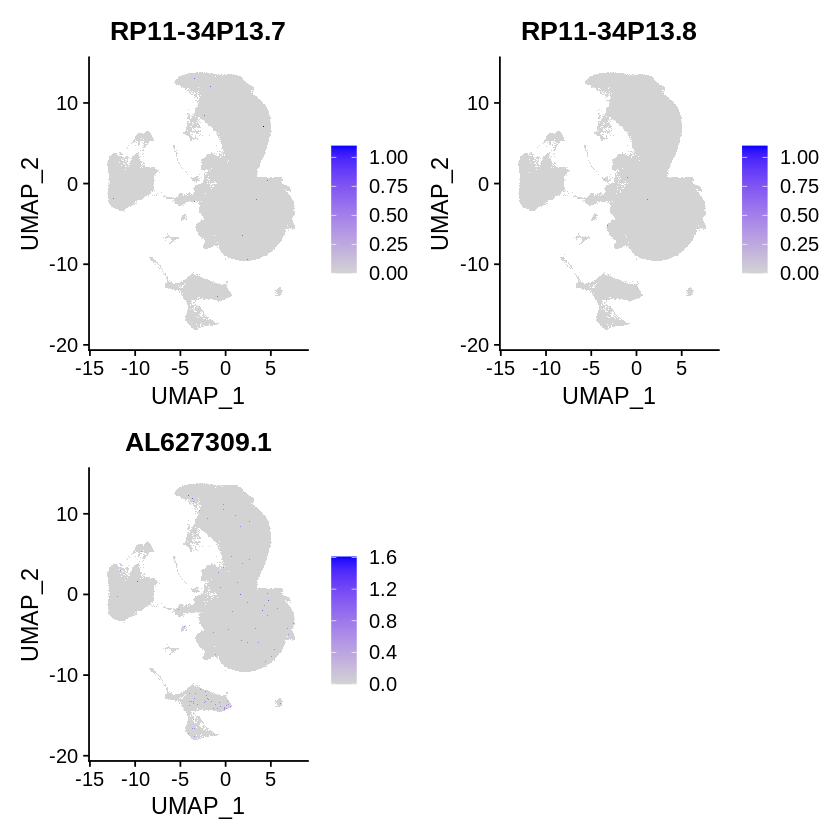

In [15]:
FeaturePlot(sce, features = features)

In [29]:
counts = sce@assays$SCT@counts
counts[1:5,1:5]

5 x 5 sparse Matrix of class "dgCMatrix"
             AAACCTGAGAATGTTG-1 AAACCTGAGAGAACAG-1 AAACCTGAGCATGGCA-1
RP11-34P13.7                  .                  .                  .
RP11-34P13.8                  .                  .                  .
AL627309.1                    .                  .                  .
RP11-34P13.9                  .                  .                  .
AP006222.2                    .                  .                  .
             AAACCTGAGTATTGGA-1 AAACCTGAGTGTCCCG-1
RP11-34P13.7                  .                  .
RP11-34P13.8                  .                  .
AL627309.1                    .                  .
RP11-34P13.9                  .                  .
AP006222.2                    .                  .

In [30]:
dim(counts)

[1]   24903 1272489

In [51]:
pca_df = as.data.frame(Embeddings(sce, reduction = "pca"))
dim(pca_df)
head(pca_df)

[1] 1272489      50

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,⋯,PC_41,PC_42,PC_43,PC_44,PC_45,PC_46,PC_47,PC_48,PC_49,PC_50
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AAACCTGAGAATGTTG-1,-0.8977885,-0.2230013,2.773472,-2.8331150,2.5099821,-5.165020,1.1716563,1.208637971,-0.6312954,1.2065182,⋯,1.5048066,-2.4197324,-5.25646097,0.1157704,6.9736529,-5.55210197,1.8173526,1.668505,-2.1583504,2.6348562
AAACCTGAGAGAACAG-1,-6.5223103,17.4277116,-12.748605,11.0849599,-0.7601229,-2.409623,-4.1635864,-0.008325622,9.2888817,-2.9037275,⋯,-0.7846957,-2.9642400,1.45792766,4.2670625,1.0267372,0.50534345,-1.8109483,-2.677470,0.3415028,1.2525216
AAACCTGAGCATGGCA-1,-7.3601017,-6.5049042,1.412964,-7.1140363,3.0296224,-1.121062,2.6984171,2.144681806,1.1170157,0.1462898,⋯,-1.1846324,0.5726215,-0.97539438,0.4738408,-0.3792089,-0.48615934,1.1783348,-4.334436,1.3387731,0.3984140
AAACCTGAGTATTGGA-1,-5.5025193,1.1063360,-3.289854,-1.0671015,1.7261105,-4.408453,0.4500996,1.383946941,-1.9030156,1.2037874,⋯,-2.3297998,0.7874379,-0.01988099,2.2656037,1.3200604,0.05847959,-0.8468437,0.170638,0.1506933,0.9417985
AAACCTGAGTGTCCCG-1,-12.1592923,5.6816566,-6.230129,0.8232114,1.9474478,0.678812,1.2685708,2.055629854,-3.0763683,1.7090038,⋯,-5.1039850,0.7989788,0.15486548,1.5518418,-0.3641352,-1.56364547,1.1078413,-2.260271,0.7137843,1.0488139
AAACCTGCAAATTGCC-1,-1.5888212,-5.9405008,1.239411,-4.9577027,1.9655322,-4.755460,0.9961445,1.530804711,0.7340049,-0.3564102,⋯,0.7541508,-0.8644822,0.39944860,-0.5110172,-0.3668021,0.25525487,0.5899837,1.035732,-0.6093043,0.8715150


In [53]:
umap_df = as.data.frame(Embeddings(sce, reduction = "umap"))
dim(umap_df)
head(umap_df)

[1] 1272489       2

,UMAP_1,UMAP_2
,<dbl>,<dbl>
AAACCTGAGAATGTTG-1,-1.3250431,-4.065017
AAACCTGAGAGAACAG-1,-2.1187532,13.364066
AAACCTGAGCATGGCA-1,5.2636104,-2.043657
AAACCTGAGTATTGGA-1,2.9235904,4.613274
AAACCTGAGTGTCCCG-1,0.9407235,6.925539
AAACCTGCAAATTGCC-1,-2.7601063,-6.454456


In [41]:
## Metadata
metadata_filename =  paste0(mydir,"/metadata.RDS")
df = readRDS(metadata_filename)

In [42]:
dim(df)
head(df)

[1] 1267768      14

,orig.ident,nCount_RNA,nFeature_RNA,pool,individual,percent.mt,latent,nCount_SCT,nFeature_SCT,cell_type,predicted.celltype.l1.score,predicted.celltype.l1,predicted.celltype.l2.score,predicted.celltype.l2
,<fct>,<dbl>,<int>,<fct>,<chr>,<dbl>,<fct>,<dbl>,<int>,<fct>,<dbl>,<chr>,<dbl>,<chr>
AAACCTGAGAATGTTG-1,onek1k,4754,1201,pool_1,691_692,1.451409,b1,3959,1201,CD4+ KLRB1+ T cell,0.9826921,CD4 T,0.6337735,CD4 TEM
AAACCTGAGAGAACAG-1,onek1k,2459,896,pool_1,693_694,3.700691,b1,3375,897,XCL1- NK,1.0000000,NK,1.0000000,NK
AAACCTGAGCATGGCA-1,onek1k,2451,674,pool_1,688_689,3.386373,b1,3513,675,CD4+ KLRB1- T cell,0.9886301,CD4 T,0.7894387,CD4 Naive
AAACCTGAGTATTGGA-1,onek1k,8720,1784,pool_1,683_684,2.626147,b1,4290,1662,CD8+ S100B+ T cell,0.7882653,CD8 T,0.7882653,CD8 TEM
AAACCTGAGTGTCCCG-1,onek1k,3461,941,pool_1,684_685,4.911875,b1,3646,940,CD8+ GNLY+ NKG7+ T cell,0.7703185,CD8 T,0.7703185,CD8 TEM
AAACCTGCAAATTGCC-1,onek1k,2383,595,pool_1,688_689,1.720520,b1,3490,598,CD4+ KLRB1- T cell,0.9694406,CD4 T,0.9059585,CD4 Naive


In [32]:
length(unique(df$individual))

[1] 981

In [46]:
pca_df$cell = rownames(pca_df)
df$cell = rownames(df)
df_to_plot = inner_join(pca_df, df, by = "cell")

In [49]:
head(df_to_plot)

,PC_1,PC_2,PC_3,PC_4,PC_5,cell,orig.ident,nCount_RNA,nFeature_RNA,pool,individual,percent.mt,latent,nCount_SCT,nFeature_SCT,cell_type,predicted.celltype.l1.score,predicted.celltype.l1,predicted.celltype.l2.score,predicted.celltype.l2
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<fct>,<dbl>,<int>,<fct>,<chr>,<dbl>,<fct>,<dbl>,<int>,<fct>,<dbl>,<chr>,<dbl>,<chr>
1,-0.8977885,-0.2230013,2.773472,-2.8331150,2.5099821,AAACCTGAGAATGTTG-1,onek1k,4754,1201,pool_1,691_692,1.451409,b1,3959,1201,CD4+ KLRB1+ T cell,0.9826921,CD4 T,0.6337735,CD4 TEM
2,-6.5223103,17.4277116,-12.748605,11.0849599,-0.7601229,AAACCTGAGAGAACAG-1,onek1k,2459,896,pool_1,693_694,3.700691,b1,3375,897,XCL1- NK,1.0000000,NK,1.0000000,NK
3,-7.3601017,-6.5049042,1.412964,-7.1140363,3.0296224,AAACCTGAGCATGGCA-1,onek1k,2451,674,pool_1,688_689,3.386373,b1,3513,675,CD4+ KLRB1- T cell,0.9886301,CD4 T,0.7894387,CD4 Naive
4,-5.5025193,1.1063360,-3.289854,-1.0671015,1.7261105,AAACCTGAGTATTGGA-1,onek1k,8720,1784,pool_1,683_684,2.626147,b1,4290,1662,CD8+ S100B+ T cell,0.7882653,CD8 T,0.7882653,CD8 TEM
5,-12.1592923,5.6816566,-6.230129,0.8232114,1.9474478,AAACCTGAGTGTCCCG-1,onek1k,3461,941,pool_1,684_685,4.911875,b1,3646,940,CD8+ GNLY+ NKG7+ T cell,0.7703185,CD8 T,0.7703185,CD8 TEM
6,-1.5888212,-5.9405008,1.239411,-4.9577027,1.9655322,AAACCTGCAAATTGCC-1,onek1k,2383,595,pool_1,688_689,1.720520,b1,3490,598,CD4+ KLRB1- T cell,0.9694406,CD4 T,0.9059585,CD4 Naive


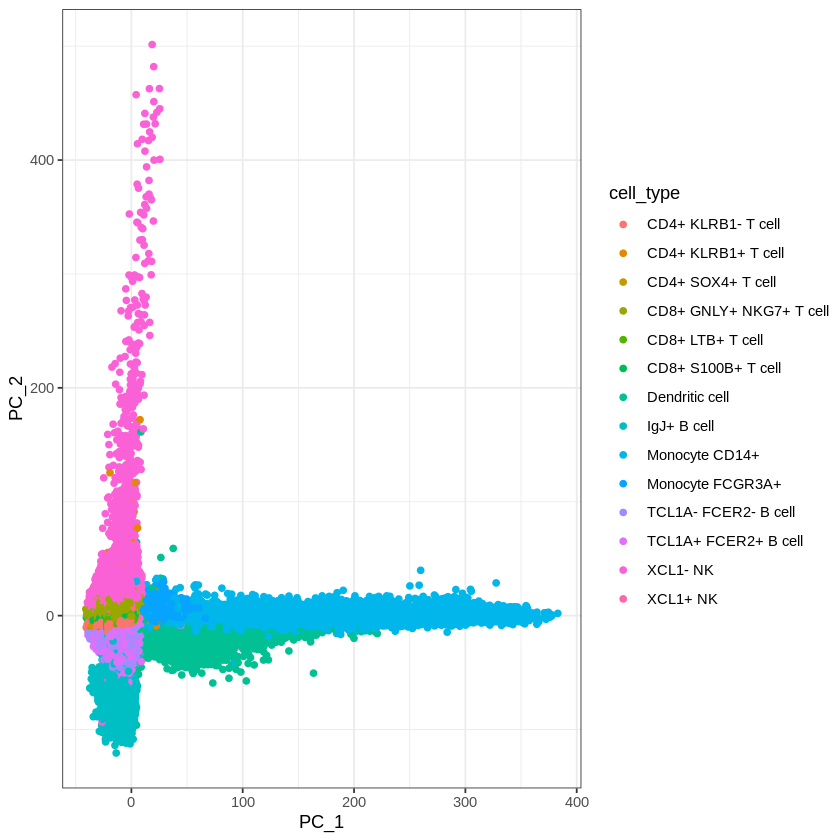

In [50]:
ggplot(df_to_plot, aes(x=PC_1, y = PC_2, colour = cell_type)) + geom_point() + theme_bw()

In [54]:
umap_df$cell = rownames(umap_df)
df_to_plot = inner_join(umap_df, df, by = "cell")

In [55]:
head(df_to_plot,2)

,UMAP_1,UMAP_2,cell,orig.ident,nCount_RNA,nFeature_RNA,pool,individual,percent.mt,latent,nCount_SCT,nFeature_SCT,cell_type,predicted.celltype.l1.score,predicted.celltype.l1,predicted.celltype.l2.score,predicted.celltype.l2
,<dbl>,<dbl>,<chr>,<fct>,<dbl>,<int>,<fct>,<chr>,<dbl>,<fct>,<dbl>,<int>,<fct>,<dbl>,<chr>,<dbl>,<chr>
1,-1.325043,-4.065017,AAACCTGAGAATGTTG-1,onek1k,4754,1201,pool_1,691_692,1.451409,b1,3959,1201,CD4+ KLRB1+ T cell,0.9826921,CD4 T,0.6337735,CD4 TEM
2,-2.118753,13.364066,AAACCTGAGAGAACAG-1,onek1k,2459,896,pool_1,693_694,3.700691,b1,3375,897,XCL1- NK,1.0000000,NK,1.0000000,NK


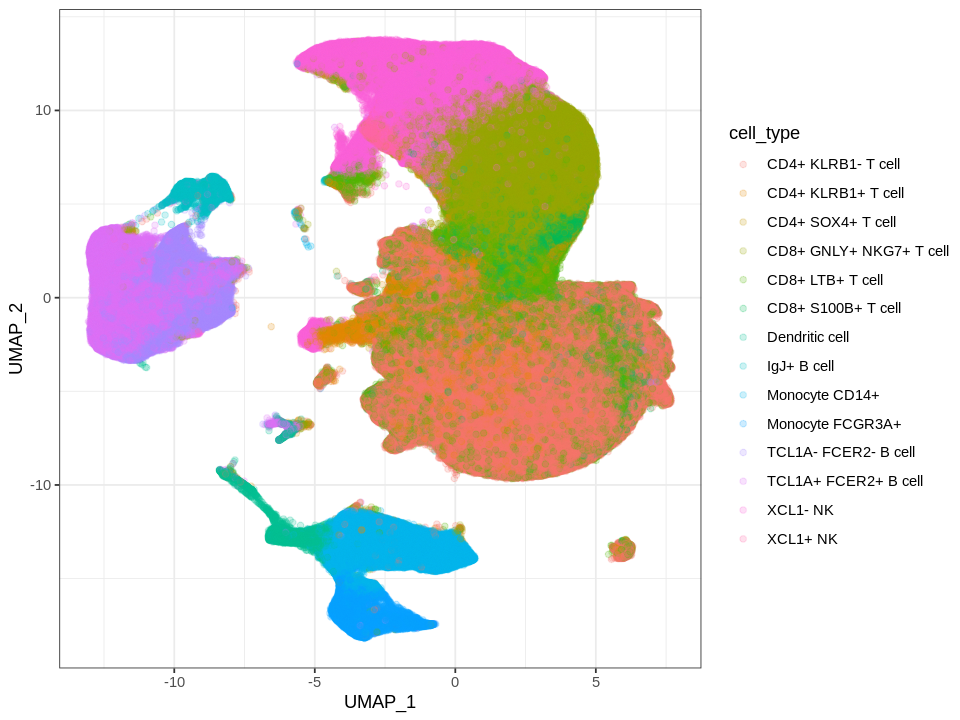

In [59]:
options(repr.plot.width = 8, repr.plot.height = 6) 
ggplot(df_to_plot, aes(x=UMAP_1, y = UMAP_2, colour = cell_type)) + geom_point(alpha = 0.2) + theme_bw()

In [61]:
as.character(unique(df$cell_type))

[1] "CD4+ KLRB1+ T cell"      "XCL1- NK"               
 [3] "CD4+ KLRB1- T cell"      "CD8+ S100B+ T cell"     
 [5] "CD8+ GNLY+ NKG7+ T cell" "TCL1A+ FCER2+ B cell"   
 [7] "CD8+ LTB+ T cell"        "TCL1A- FCER2- B cell"   
 [9] "XCL1+ NK"                "Monocyte FCGR3A+"       
[11] "Monocyte CD14+"          "Dendritic cell"         
[13] "IgJ+ B cell"             "CD4+ SOX4+ T cell"

In [65]:
celltypes = c("CD4+ KLRB1- T cell","CD4+ KLRB1+ T cell","CD4+ SOX4+ T cell","CD8+ GNLY+ NKG7+ T cell",
              "CD8+ LTB+ T cell","CD8+ S100B+ T cell","XCL1- NK","XCL1+ NK","IgJ+ B cell","TCL1A- FCER2- B cell",
              "TCL1A+ FCER2+ B cell","Monocyte CD14+","Monocyte FCGR3A+","Dendritic cell")
length(celltypes)

[1] 14

In [66]:
colorcodes = c("#882E72","#B178A6","#D6C1DE","#1965B0","#5289C7","#7BAFDE","#4EB265","#90C987","#CAE0AB","#F7EE55",
               "#F6C141","#F1932D","#E8601C","#DC050C")
length(colorcodes)

[1] 14

In [74]:
df_colours = data.frame(cell_type = celltypes, colours = colorcodes)
df_colours = df_colours[order(df_colours$cell_type),]
df_colours

,cell_type,colours
,<chr>,<chr>
1,CD4+ KLRB1- T cell,#882E72
2,CD4+ KLRB1+ T cell,#B178A6
3,CD4+ SOX4+ T cell,#D6C1DE
4,CD8+ GNLY+ NKG7+ T cell,#1965B0
5,CD8+ LTB+ T cell,#5289C7
6,CD8+ S100B+ T cell,#7BAFDE
14,Dendritic cell,#DC050C
9,IgJ+ B cell,#CAE0AB
12,Monocyte CD14+,#F1932D


In [70]:
write.csv(df_colours, paste0(mydir,"celltype_colours.csv"))

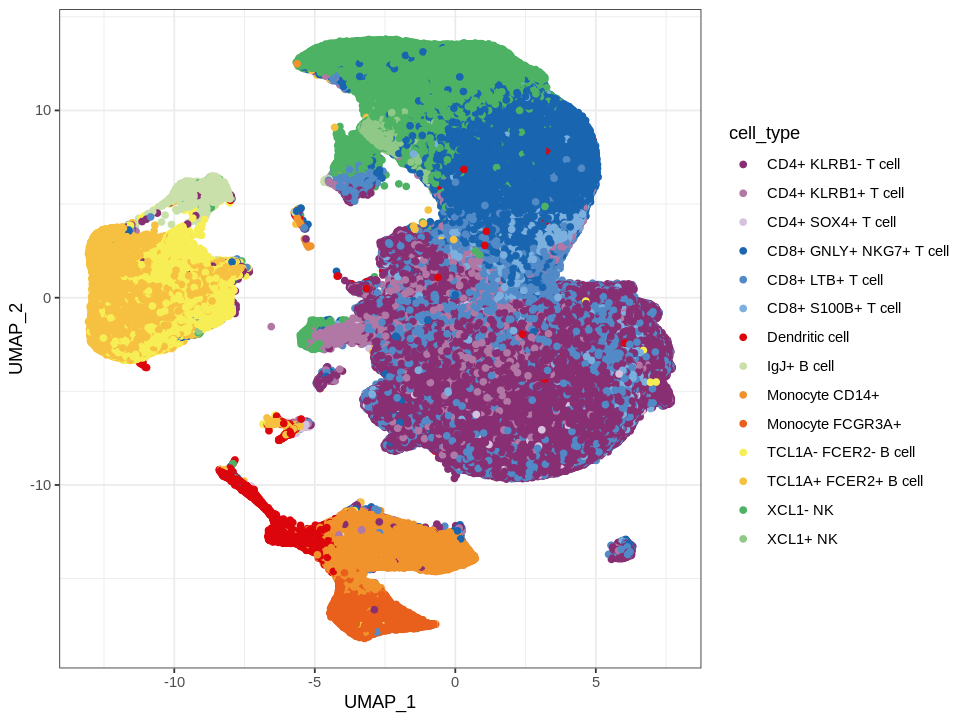

In [76]:
options(repr.plot.width = 8, repr.plot.height = 6) 
ggplot(df_to_plot, aes(x=UMAP_1, y = UMAP_2, colour = cell_type)) + geom_point() + theme_bw() +
    scale_colour_manual(values = df_colours$colours) 

In [19]:
# Create Sample Mapping File (SMF)

In [20]:
smf_df = data.frame(phenotype_sample_id = rownames(df), genotype_individual_id = df$individual)
head(smf_df)

,phenotype_sample_id,genotype_individual_id
,<chr>,<chr>
1,AAACCTGAGAATGTTG-1,691_692
2,AAACCTGAGAGAACAG-1,693_694
3,AAACCTGAGCATGGCA-1,688_689
4,AAACCTGAGTATTGGA-1,683_684
5,AAACCTGAGTGTCCCG-1,684_685
6,AAACCTGCAAATTGCC-1,688_689


In [26]:
smf_filename = paste0(input_files_dir,"smf.csv")
smf_filename

[1] "/share/ScratchGeneral/anncuo/OneK1K/input_files_CellRegMap/smf.csv"

In [27]:
write.csv(smf_df, smf_filename)

In [ ]:
# Create Cell Context File (PCA)

In [77]:
contexts_filename = paste0(input_files_dir,"PCs.csv")

In [78]:
write.csv(pca_df, contexts_filename)

In [79]:
# Create Feature-Variant Filter File (fvf)

In [80]:
## eQTL results
results_filename =  paste0(mydir,"OneK1K_eQTLs_Results_03022021.tsv")
eqtl_df = read.csv(results_filename, sep="\t")
head(eqtl_df)

,cell_type,GeneID,Gene_EnsemblID,rsID,Chromosome,Position,SNP_assessed_allele,eSNP_rank,rho_correlation_coefficient,S.statistics,pvalue,qvalue,FDR
,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,B IN,RP11-298J20.3,ENSG00000226899,rs4962711,10,126644482,C,eSNP1,-0.473,232418782,8.653e-56,5.108e-50,2.164e-05
2,B IN,PPA1,ENSG00000180817,rs12355080,10,71963608,A,eSNP1,0.428,90338126,6.308e-45,1.646e-40,2.164e-05
3,B IN,GDI2,ENSG00000057608,rs3736461,10,5855403,C,eSNP1,-0.278,201715943,6.764e-19,6.078e-15,2.164e-05
4,B IN,OPTN,ENSG00000123240,rs57057378,10,13160035,A,eSNP1,-0.258,198494721,2.342e-16,2.032e-12,2.164e-05
5,B IN,MGMT,ENSG00000170430,rs12254582,10,131279791,G,eSNP1,-0.220,192526141,3.259e-12,2.150e-08,2.164e-05
6,B IN,VDAC2,ENSG00000165637,rs11543,10,76970613,C,eSNP1,-0.219,192405014,3.889e-12,2.546e-08,2.164e-05


In [ ]:
# figure out what genes and SNPs are called in other files to pick correct IDs here

In [ ]:
### Kinship file

In [82]:
list.files(paste0(mydir,"grm"))

[1] "grm.bed"       "grm.bim"       "grm.fam"       "grm.grm.bin"  
[5] "grm.grm.id"    "grm.grm.N.bin" "grm.hh"        "grm.log"      
[9] "y_par.snps"